Name    : **Richard Edgina Virgo**  
Batch   : **006**

---

As a Data Scientist at Bank XXX, I have been tasked with developing a model to predict whether the bank's credit card customers are likely to default. This model will analyze factors such as repayment history, bill amounts, age, education level, and previous payment amounts. By identifying customers at risk of defaulting, the model will enable the bank to issue timely notices and warnings to those customers. In order to analyse the data, the SMART method will be used, namely make machine learning model for prediction classification customers at risk of defaulting, Using F1 score to analyze the how good the model for prediction is and use hyperparameter tuning to make the best model ,Using SVM as model and hyperparameter tuning successfully make model with great f1 score , successfully make the best model and evaluate it before Sunday at 23:59.

---
---

<vspace>

### ***Query SQL***

---

```sql
SELECT limit_balance, CAST(Sex AS int) AS Sex, CAST(education_level AS int) AS education_level, CAST(marital_status AS int) AS marital_status, age, pay_0, pay_2, pay_3, pay_4, CAST(pay_5 AS float64) AS pay_5, CAST(pay_6 AS float64) AS pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, CAST(default_payment_next_month AS int) AS default_payment_next_month
FROM
bigquery-public-data.ml_datasets.credit_card_default
LIMIT 12012
```

---

<vspace>

First things to do is Import Libraries

### ***Import Libraries***

---

In [1]:
# Importing pandas to load data
import pandas as pd
# Importing seaborn to plot data
import seaborn as sns
# Importing matplotlib to plot data
import matplotlib.pyplot as plt
# Importing phik for correlation analysis
import phik
# Importing numpy for array
import numpy as np
# Importing seaborn for visualization
import seaborn as sns
# Importing OrdinalEncoder for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
# Import pickle and json for saving and loading data
import pickle
import json
# Import warning for controlling warning
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
# Import Feature engineering
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

# Import Warning


---
---

<vspace>

### ***Data Loading***

---

First, read the csv file

In [2]:
# Show the data frame
df = pd.read_csv("P1G5_Set_1_Richard_Edgina.csv")
df

,limit_balance,Sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


Table aboves indicate that there are **24** columns and **2965** rows. Now i want to see 5 top data and 5 bottom data. After that i will change several names such Sex, education_level, marital_status, and age

In [3]:
# Display 5 top data
df.head(5)

,limit_balance,Sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


In [4]:
# Display 5 bottom data
df.tail(5)

,limit_balance,Sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [5]:
# Change Sex column name to jenis_kelamin
df.rename(columns = {'Sex':'Gender'}, inplace = True)
# Change education_level column name to tingkat_pendidikan
df.rename(columns = {'education_level':'Education'}, inplace = True)
# Change marital_status column name to status_perkawinan
df.rename(columns = {'marital_status':'Marital_status'}, inplace = True)
# Change age column to umur
df.rename(columns = {'age':'Age'}, inplace = True)

Here is the table after rename some columns

In [6]:
df

,limit_balance,Gender,Education,Marital_status,Age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


Next I want to see the number of duplicate data

In [7]:
# See the numbers of duplicated data
df.duplicated().sum()
# Drop duplicated data
df.drop_duplicates()

,limit_balance,Gender,Education,Marital_status,Age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


---
---

<vspace>

### ***Data Understanding***

---

Following is the column description

***Limit Balance***   : Amount of given credit in NT dollars includes individual and family/supplementary credit  
***Sex***             : Gender(**1** = male, **2** = female)  
***Education***       : Education Level (**1**=Primary School, **2**=Secondary School, **3**=High school, **4**=University, **5**=Master, **6**=Doctor)  
***Marital_status***  : Marital status (**1**=married, **2**=single, **3**=others)  
***Age***             : Age in years  

***pay_0***           : Repayment status in September, 2005 (**-1**=pay duly, **1**=payment delay for one month, **2**=payment delay for two months, ... **8**=payment delay for eight months, **9**=payment delay for nine months and above)  
***pay_2***           : Repayment status in **August**, 2005 (scale same as above)    
***pay_3***           : Repayment status in **July**, 2005 (scale same as above)  
***pay_4***           : Repayment status in **June**, 2005 (scale same as above)  
***pay_5***           : Repayment status in **May**, 2005 (scale same as above)  
***pay_6***           : Repayment status in **April**, 2005 (scale same as above)    

***bill_amt_1***      : Amount of bill statement in **September**, 2005 (NT dollar)  
***bill_amt_2***      : Amount of bill statement in **August**, 2005 (NT dollar)  
***bill_amt_3***      : Amount of bill statement in **July**, 2005 (NT dollar)  
***bill_amt_4***      : Amount of bill statement in **June**, 2005 (NT dollar)  
***bill_amt_5***      : Amount of bill statement in **May**, 2005 (NT dollar)  
***bill_amt_6***      : Amount of bill statement in **April**, 2005 (NT dollar)  

***pay_amt_1***       : Amount of previous payment in **September**, 2005 (NT dollar)  
***pay_amt_2***       : Amount of previous payment in **August**, 2005 (NT dollar)  
***pay_amt_3***       : Amount of previous payment in **July**, 2005 (NT dollar)  
***pay_amt_4***       : Amount of previous payment in **June**, 2005 (NT dollar)  
***pay_amt_5***       : Amount of previous payment in **May**, 2005 (NT dollar)  
***pay_amt_6***       : Amount of previous payment in **April**, 2005 (NT dollar)  

***default_payment_next_month***    : Default payment (**1**=yes, **0**=no)






From our analysis of the data, we have identified that certain columns have incorrect data types. These columns include Gender, Education, Marital Status, Pay 0, Pay 2, Pay 3, Pay 4, Pay 5, Pay 6, and Default Payment Next Month. Although these columns are currently assigned integer or numerical data types, they actually represent categorical data.

In [8]:
# Change data type from numerical to string
df[['Gender','Education','Marital_status','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6', 'default_payment_next_month']] = df[['Gender','Education','Marital_status','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6', 'default_payment_next_month']].astype(str)

From my review of the data, I have observed that several entries do not align with the column descriptions. I now intend to identify which specific entries are inconsistent with their respective column descriptions. If the number of mismatched entries is minimal, I will drop the columns containing these discrepancies.



In [9]:
# Display marital status unique value
print('unique value for marital status is :',df['Marital_status'].unique())
(df['Marital_status'] == '0').sum()

unique value for marital status is : ['1' '2' '3' '0']


4

The unique values in the data indicate that there are entries not specified in the column description, specifically the value '0'. Since there are only four instances of '0' in the data, I will proceed to drop these entries.

In [10]:
# Select data frame that don't have '0' value
df = df[df['Marital_status'] != '0']

Next We see the unique value from education

In [11]:
# Display marital status unique value
print('unique value for education level is :', df['Education'].unique())
(df['Education'] == '0').sum()

unique value for education level is : ['6' '4' '1' '2' '3' '5' '0']


2

The unique values in the data indicate that there are entries not specified in the column description, specifically the value '0'. Since there are only two instances of '0' in the data, I will proceed to drop these entries.

In [12]:
# Select data frame that don't have '0' value
df = df[df['Education'] != '0']

Next see for pay_0 unique value

In [13]:
# Display pay_0 unique value
print('unique value for pay_0 is :', df['pay_0'].unique())
print((df['pay_0'] == '0.0').sum())
print((df['pay_0'] == '-2.0').sum())

unique value for pay_0 is : ['0.0' '2.0' '1.0' '-1.0' '-2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0']
1513
245


The unique values indicate that there are data entries not described in the column definition, specifically -2.0 and 0.0. There are 1,513 instances of 0.0 and 245 instances of -2.0. Since these foreign values are prevalent and appear in similar contexts in other columns, I will change 0.0 and -2.0 to -1.0. I assume that the large number of 0.0 and -2.0 entries suggests they serve the same purpose as -1.0, which likely represents individuals who pay their credit card bills on time.

In [14]:
# Replace dataframe with 0.0 to -1.0
df = df.replace('0.0','-1.0')


In [15]:
# Replace dataframe with -2.0 to -1.0
df = df.replace('-2.0','-1.0')

After we understanding the data, the next step is Exploratory Data Analysis (EDA)

---
---

<vspace>

### ***Exploratory Data Analysis (EDA)***

---

From the Data Understanding, I want to explore more about data

### ***1. Age Distribution and Main Age Group for Credit Card Defaults***

I want to determine which age group has the highest rate of credit card defaults. First, I will categorize the ages into four groups: pediatric, young adult, middle-aged, and elderly.

In [16]:
# Make new data frame with name df_eda
df_eda = df
# Create container
penampung = []
# Loop for i in data frame with column 'Age'
for i in df_eda['Age']:
    # Condition for classification ages
    if 0 <= i <= 14:
        penampung.append('Pedriatic Group')
    elif 14< i <= 47:
        penampung.append('Young Age')
    elif 47< i <= 63:
        penampung.append('Middle Age')
    elif i > 63:
        penampung.append('Elderly Age')
# Make new column
df_eda['Age Group'] = penampung

Next, I will group by age group and default payment status for the next month.

In [17]:
# Group by age group and default payment status for the next month
KelompokUmur = df_eda.groupby(['Age Group','default_payment_next_month'])['default_payment_next_month'].count()

Now let's visualize it

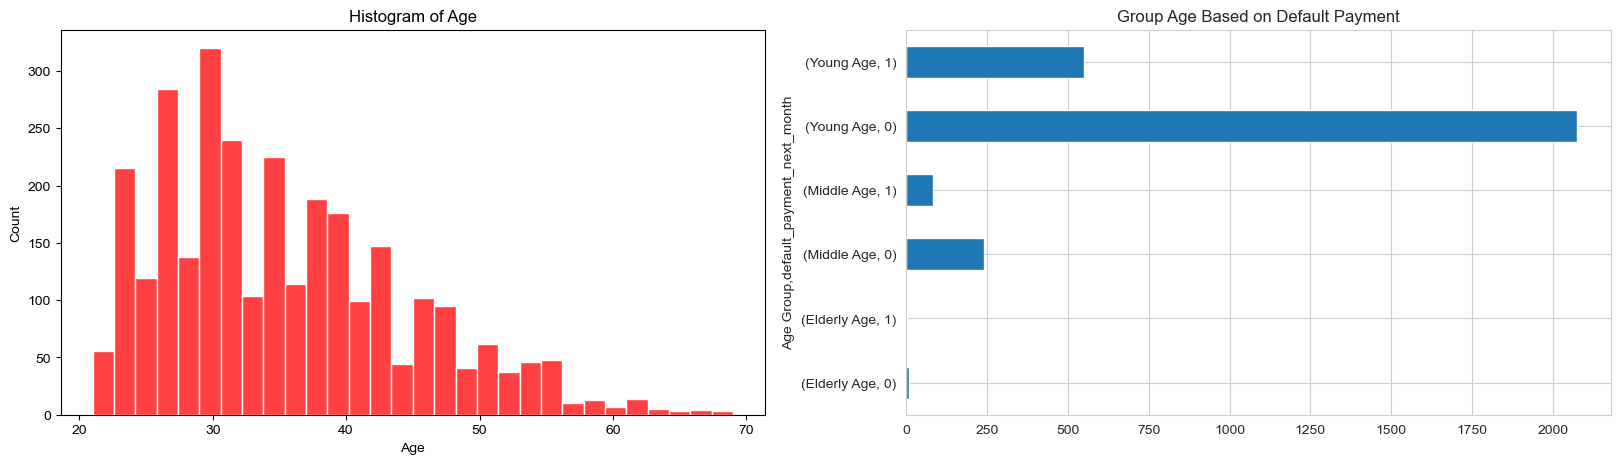

In [18]:
# Creating subplots with 1 row and 2 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.histplot(df_eda['Age'], kde = False, color ='red', bins = 30)
plt.title('Histogram of Age')
plt.subplot(1,2,2)
KelompokUmur.plot(kind = 'barh')
plt.title('Group Age Based on Default Payment')
# Show plot
plt.show()

The histogram on the left indicates that the age distribution is slightly skewed, with the majority of ages clustering around 30 years and the fewest ages being over 50 years old. The chart on the right shows that the age group with the highest rate of payment defaults is the young age group, while the elderly age group has the lowest rate of payment defaults.

### ***2. Education Distribution and Main Education Level Group for Credit Card Defaults***

I want to determine which Education level has the highest rate of credit card defaults. 

In [19]:
# Group by Education Level and default payment status for the next month
EducationLevel = df_eda.groupby(['Education','default_payment_next_month'])['default_payment_next_month'].count()

Now let's visualize it

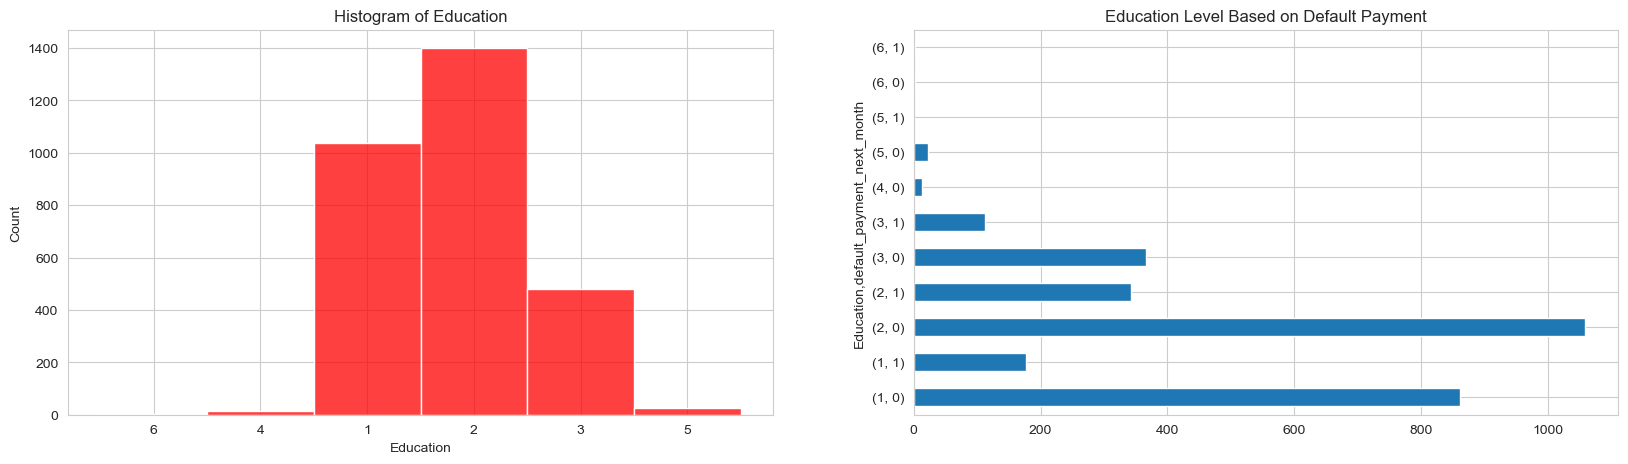

In [20]:
# Creating subplots with 1 row and 2 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.histplot(df_eda['Education'], kde = False, color ='red', bins = 30)
plt.title('Histogram of Education')

plt.subplot(1,2,2)
EducationLevel.plot(kind = 'barh')
plt.title('Education Level Based on Default Payment')
# Show plot
plt.show()

The histogram on the left indicates that the age distribution is slightly skewed, with the majority of education level on Secondary School and the fewest Education level is Doctor. The chart on the right shows that the Education Level group with the highest rate of payment defaults is the Secondary School group, while the Doctor group has the lowest rate of payment defaults.

### ***3. Repayment Status In September 2005 Distribution and Main Repayment Status Group for Credit Card Defaults***

I want to determine which Repayment Status in September 2005 level has the highest rate of credit card defaults. 

In [21]:
# Group by Repayment status in September 2005 and default payment status for the next month
Repayment = df_eda.groupby(['pay_0','default_payment_next_month'])['default_payment_next_month'].count()

Now let's visualize it

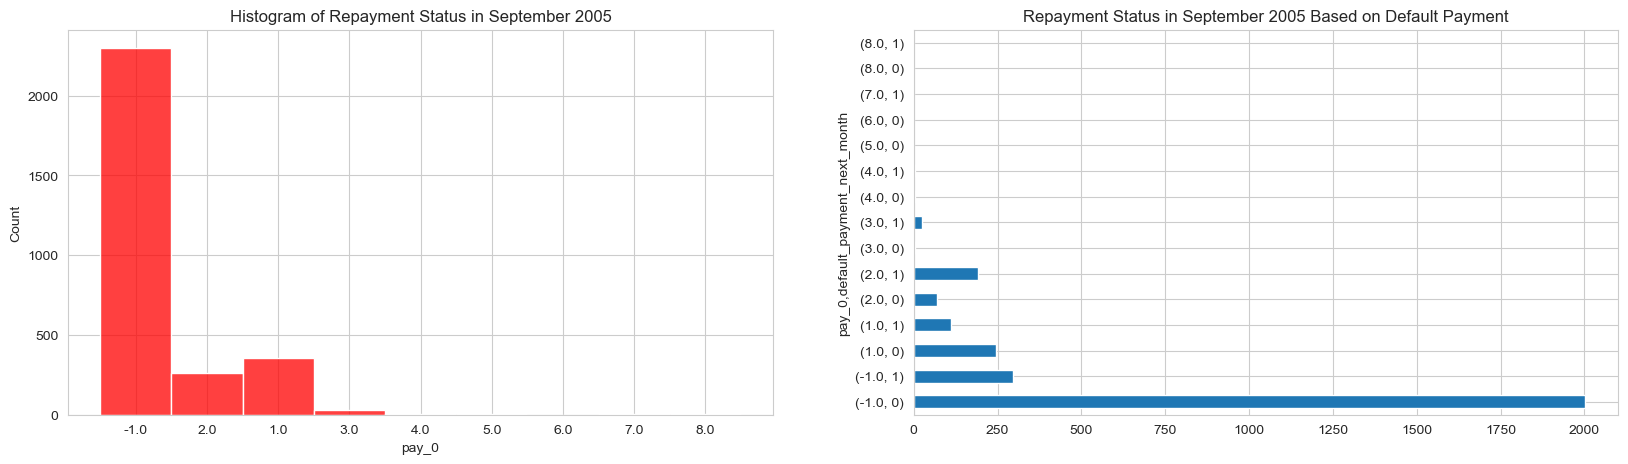

In [22]:
# Creating subplots with 1 row and 3 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.histplot(df_eda['pay_0'], kde = False, color ='red', bins = 30)
plt.title('Histogram of Repayment Status in September 2005')
plt.subplot(1,2,2)
Repayment.plot(kind = 'barh')
plt.title('Repayment Status in September 2005 Based on Default Payment')
# Show plot
plt.show()

In [23]:
df_eda['pay_0'].skew()

2.0530781241231106

The histogram on the left indicates that the age distribution is highly skewed, with the majority of repayment status on pay duly and the fewest repayment status is payment delay greater than 3 months. The chart on the right shows that the Repayment status with the highest rate of payment defaults is the pay duly.

### ***4. Billing Amount In September 2005 Distribution and Main Billing Amount Group for Credit Card Defaults***

First, I will categorize the Billing Amount into 5 groups: Bank Owe You, There is no Billing Amount, Small Billing Amount, Medium Billing Amount, and Big Billing Amount

In [24]:
# Group by Repayment status in September 2005 and default payment status for the next month
Billing = df_eda.groupby(['bill_amt_1','default_payment_next_month'])['default_payment_next_month'].count()

In [25]:
container = []
# Loop for i in data frame with column 'Age'
for i in df_eda['bill_amt_1']:
    # Condition for classification ages
    if -1000000.0 <= i < 0.0:
        container.append('Bank Owe You')
    elif i == 0.0:
        container.append('There is no Billing Amount')
    elif 0.0 < i <= 10000.0:
        container.append('Small Billing Amount')
    elif 10000.0 < i <= 100000.0:
        container.append('Medium Billing Amount')
    elif i > 100000.0:
        container.append('Big Billing Amount')
# Make new column
df_eda['Billing Amount Group'] = container

Next, I will group by Billing Amount group and default payment status the next month.

In [26]:
# Group by Billing Amount in September 2005 and default payment status for the next month
BillingAmount = df_eda.groupby(['Billing Amount Group','default_payment_next_month'])['default_payment_next_month'].count()

Now let's visualize it

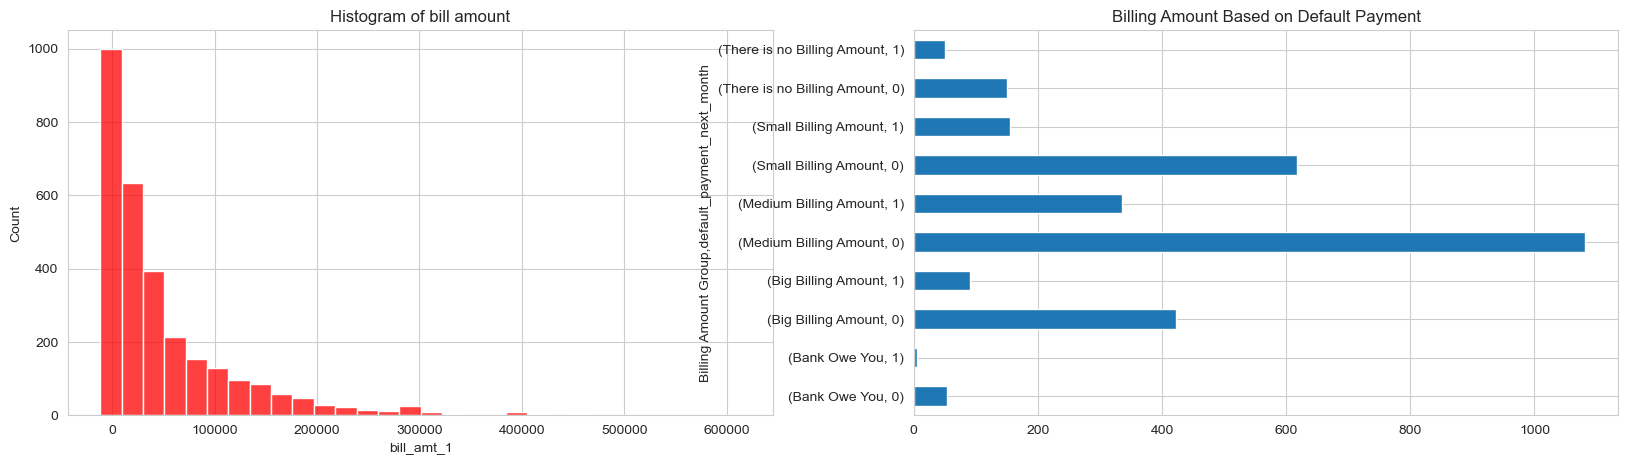

In [27]:
# Creating subplots with 1 row and 3 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.histplot(df_eda['bill_amt_1'], kde = False, color ='red', bins = 30)
plt.title('Histogram of bill amount')
# Setting the style of seaborn plots to "darkgrid"
plt.subplot(1,2,2)
BillingAmount.plot(kind = 'barh')
plt.title('Billing Amount Based on Default Payment')
# Show plot
plt.show()

The histogram on the left indicates that the billing amount distribution is highly skewed, with the majority of billing amount clustering around 0 dollar and the fewest billing amount being over 30000 dollars. The chart on the right shows that the billing amount group with the highest rate of payment defaults is medium billing amount, while Bank Owe you group has the lowest rate of payment defaults.

After completing the EDA, proceed with Feature Engineering.

---
---

Because there is columns that i don't want so i will drop it

In [28]:
# Drop columns
df = df.drop(['Age Group',
       'Billing Amount Group'],axis=1)

<vspace>

### ***Feature Engineering***

---

First, we separate between label and features

In [29]:
# Make X data frame without label
X = df.drop('default_payment_next_month', axis=1)
# Make y data frame only label
y = df['default_payment_next_month']

After separation between label and features, proceed with split into test and train data

In [30]:
# Use sklearn to split the data
from sklearn.model_selection import train_test_split
# Data split into X_train, X_test, y_train , and y_test with test size is 0.2 or 20% from a whole data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
# Show train dan test data size
print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
# Call X_train
X_train

Train size :  (2367, 23)
Test size :  (592, 23)


,limit_balance,Gender,Education,Marital_status,Age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
557,180000.0,1,2,1,40.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,49475.0,50840.0,50090.0,48345.0,5000.0,2000.0,2000.0,2000.0,2000.0,2000.0
1608,40000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,18583.0,19353.0,19440.0,20279.0,0.0,18583.0,1460.0,547.0,1000.0,500.0
561,50000.0,1,2,2,27.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,50297.0,36164.0,37616.0,39062.0,2000.0,2500.0,2000.0,2000.0,2000.0,2000.0
2706,240000.0,2,1,1,55.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,21585.0,3900.0,0.0,0.0,0.0,21585.0,0.0
936,20000.0,1,2,2,34.0,-1.0,-1.0,-1.0,2.0,-1.0,...,18740.0,18373.0,18768.0,19315.0,2000.0,2500.0,1000.0,1000.0,1000.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,200000.0,1,1,2,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,480000.0,2,2,1,31.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,20885.0,19949.0,23031.0,27176.0,5004.0,5000.0,795.0,5000.0,5000.0,10000.0
1096,90000.0,2,2,1,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,15459.0,43380.0,46632.0,14177.0,93788.0,10000.0,33000.0,5300.0,5000.0,2913.0
235,80000.0,2,1,2,22.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,76022.0,58897.0,54512.0,51937.0,3200.0,2229.0,1900.0,4000.0,5000.0,21000.0


After splitting the data, proceed with missing value handling.

---

<vspace>

### ***Missing Value Handling***

---

First we see missing value from X and y data

In [31]:
# Calculate missing value from X and y data 
print(f'The Missing Value for X is {X.isnull().sum().sum()}')
print(f'The Missing Value for y is {y.isnull().sum().sum()}')

The Missing Value for X is 0
The Missing Value for y is 0


Missing value for X and y is 0, it indicated there is no missing value. After missing value handling, proceed with outlier handling

---

<vspace>

### ***Outlier Handling***

---

In [32]:
# Make Function for handling outlier
def handling_outlier(X_train):  
    '''
    Fungsi ini dibuat untuk melakukan handling outlier berdasarkan distribusi data dan persentase outlier
    '''
    # Select column name from Numerical data types X_train
    for i in X_train.select_dtypes(include=np.number).columns.tolist():
        # Condition if the data is normal distribution
        if -0.5 <= X_train[i].skew() <= 0.5:
            # Calculate upper boundary, lower boundary and use outlier capping
            up_bound = X_train[i].mean() + 3 * X_train[i].std()
            low_bound = X_train[i].mean() - 3 * X_train[i].std()
            X_train[i] = X_train[i].clip(lower=low_bound, upper=up_bound) 
        # Condition if the data is skewed distribution
        elif -1 <= X_train[i].skew() < -0.5 or 0.5 < X_train[i].skew() <= 1:
            # Calculate upper boundary, lower boundary and use outlier capping
            up_bound =  X_train[i].quantile(0.25) + 1.5 * (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))
            low_bound =  X_train[i].quantile(0.25) - 1.5 * (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))
            X_train[i] = X_train[i].clip(lower=low_bound, upper=up_bound)
        # Condition if the data is extreme skewed distribution
        elif X_train[i].skew() < -1 or X_train[i].skew() > 1:
            # Calculate upper boundary, lower boundary and use outlier capping
            up_bound =  X_train[i].quantile(0.25) + 3 * (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))
            low_bound =  X_train[i].quantile(0.25) - 3 * (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))
            X_train[i] = X_train[i].clip(lower=low_bound, upper=up_bound) 
    return X_train

After creating the outlier handling function, apply it.

In [33]:
# Use the outlier handling function
X_train = handling_outlier(X_train)
# See the shape of X_train
X_train.shape

(2367, 23)

Equalizing y_train index with X_train

In [34]:
# X train Index
X_train_index = X_train.index
# Selection y_train column based on X_train index
y_train = y_train.loc[y_train.index.isin(X_train_index)]

After outlier handling, proceed with feature selection

---
---

<vspace>

### ***Feature Selection***

---

First, combine X_train and y_train. y_train is used in feature selection for see the correlation between label and independen variables

In [35]:
# Concat X_train and y_train
X_feature = pd.concat([X_train, y_train], axis=1)

In [36]:
X_feature

,limit_balance,Gender,Education,Marital_status,Age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
557,180000.0,1,2,1,40.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,50840.0,50090.0,48345.0,5000.0,2000.0,2000.0,2000.0,2000.0,2000.0,1
1608,40000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,19353.0,19440.0,20279.0,0.0,13019.5,1460.0,547.0,1000.0,500.0,0
561,50000.0,1,2,2,27.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,36164.0,37616.0,39062.0,2000.0,2500.0,2000.0,2000.0,2000.0,2000.0,1
2706,240000.0,2,1,1,55.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,21585.0,3900.0,0.0,0.0,0.0,11513.5,0.0,0
936,20000.0,1,2,2,34.0,-1.0,-1.0,-1.0,2.0,-1.0,...,18373.0,18768.0,19315.0,2000.0,2500.0,1000.0,1000.0,1000.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,200000.0,1,1,2,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
905,480000.0,2,2,1,31.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,19949.0,23031.0,27176.0,5004.0,5000.0,795.0,5000.0,5000.0,10000.0,0
1096,90000.0,2,2,1,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,43380.0,46632.0,14177.0,13137.0,10000.0,12555.0,5300.0,5000.0,2913.0,0
235,80000.0,2,1,2,22.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,58897.0,54512.0,51937.0,3200.0,2229.0,1900.0,4000.0,5000.0,12052.5,0


In [37]:
# Make Function for feature selection
def Feature_selection(X):
    for i in X_train:
        # Calculate Coefficient Correlation using phi_k
        corr_coef = X.phik_matrix().loc['default_payment_next_month'].loc[i]
        # Show coefficient correlation
        print(f'Korelasi Koefisien dari {i} adalah {corr_coef}')
        # Condition for drop feature based on coefficient correlation
        if -0.1 < corr_coef < 0.1:
            X = X.drop(i, axis=1)
        else:
            pass
    return X

The threshold I used for correlation is 0.1. I assume that if the correlation coefficient is between -0.1 and 0.1, the feature has no correlation to the label/target.

In [38]:
# Apply the function
X_feature = Feature_selection(X_feature)

interval columns not set, guessing: ['limit_balance', 'Age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Korelasi Koefisien dari limit_balance adalah 0.20358291667173978
interval columns not set, guessing: ['limit_balance', 'Age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Korelasi Koefisien dari Gender adalah 0.0
interval columns not set, guessing: ['limit_balance', 'Age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Korelasi Koefisien dari Education adalah 0.1278336756415772
interval columns not set, guessing: ['limit_balance', 'Age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_a

Here is the data after feature selection

In [39]:
X_feature

,limit_balance,Education,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
557,180000.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5000.0,2000.0,2000.0,2000.0,2000.0,2000.0,1
1608,40000.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,13019.5,1460.0,547.0,1000.0,500.0,0
561,50000.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2000.0,2500.0,2000.0,2000.0,2000.0,2000.0,1
2706,240000.0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3900.0,0.0,0.0,0.0,11513.5,0.0,0
936,20000.0,2,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,2000.0,2500.0,1000.0,1000.0,1000.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,200000.0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
905,480000.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5004.0,5000.0,795.0,5000.0,5000.0,10000.0,0
1096,90000.0,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,13137.0,10000.0,12555.0,5300.0,5000.0,2913.0,0
235,80000.0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3200.0,2229.0,1900.0,4000.0,5000.0,12052.5,0


In [40]:
# Drop Default payment next month column from X_feature to get X_train
X_train = X_feature.drop('default_payment_next_month', axis=1)

Equalizing X_train column to X_test

In [41]:
# X train column
X_test = X_test.drop(['Gender','Marital_status','bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'], axis=1)

In [42]:
X_test

,limit_balance,Education,Age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
796,150000.0,2,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2000.0,1500.0,1500.0,1000.0,0.0,0.0
1070,20000.0,2,30.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,0.0,1600.0,1602.0,900.0,900.0,636.0
1215,80000.0,3,41.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1576.0,1589.0,1000.0,239.0,0.0,1696.0
1526,460000.0,1,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5229.0,580464.0,80017.0,31017.0,27.0,38700.0
1611,160000.0,2,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,390.0,1560.0,0.0,0.0,0.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,500000.0,1,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22650.0,0.0,3887.0,0.0,7413.0,0.0
501,360000.0,2,31.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14128.0,11208.0,6554.0,7248.0,7122.0,6144.0
119,150000.0,1,45.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3000.0,1300.0,1300.0,1200.0,1200.0,0.0
364,90000.0,1,25.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,4000.0,3258.0,1000.0,0.0,77500.0,0.0


In [43]:
# Select Numerical feature from X_train
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# Select Categorical feature from X_train
cat_cols = X_train.select_dtypes(include=object).columns.tolist()
# Show the numerical and categorical features
print(f'numerical columns   : {num_cols}')
print(f'categorical columns : {cat_cols}')

numerical columns   : ['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
categorical columns : ['Education', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


Next, split numerical and categorical from X_train and X_test

In [44]:
# Split numerical and categorical from X_train and X_test
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

X_train_cat = X_train[cat_cols]
X_test_cat = X_test[cat_cols]

After splitting the data, proceed with Cardinality Check

---

<vspace>

### ***Cardinality Check***

Cardinality check is used for ensures that the data don't have high cardinality or have many unique values

In [45]:
# Looping for Cardinality Check
for i in cat_cols:
    # Calculate Cardinality 
    Kardinalitas = len(X_train_cat[i].unique())
    # Make condition
    if Kardinalitas > 10:
        print(f'Kardinalitas dari {i} sebesar {Kardinalitas} sehingga kardinalitas {i} besar ')
    else:
        print(f'Kardinalitas dari {i} sebesar {Kardinalitas} sehingga kardinalitas {i} kecil ')

Kardinalitas dari Education sebesar 6 sehingga kardinalitas Education kecil 
Kardinalitas dari pay_0 sebesar 8 sehingga kardinalitas pay_0 kecil 
Kardinalitas dari pay_2 sebesar 8 sehingga kardinalitas pay_2 kecil 
Kardinalitas dari pay_3 sebesar 7 sehingga kardinalitas pay_3 kecil 
Kardinalitas dari pay_4 sebesar 8 sehingga kardinalitas pay_4 kecil 
Kardinalitas dari pay_5 sebesar 7 sehingga kardinalitas pay_5 kecil 
Kardinalitas dari pay_6 sebesar 6 sehingga kardinalitas pay_6 kecil 


Due to low cardinality, the column will be not drop. Next proceed with feature scaling and encoding

---
---

<vspace>

### ***Feature Scaling and Encoding***

---

Because we using pipeline to scaling and encode, we don't have to scale and encode the X_train and X_test individually.

Next is splitting Education from X_train_Cat, because Education is ordinal categorical data with different categories. So i will encoded with different label encoder

In [46]:
# Split Education columns from X_train_cat
X_Education_train_cat = X_train_cat['Education']
del X_train_cat['Education']

In [47]:
# Split Education columns from X_test_cat
X_Education_test_cat = X_test_cat['Education']
del X_test_cat['Education']

---

#### ***Ordinal Encoding***

Here is categories for pay_0, pay_2, pay_3, pay_4, pay_4, pay_5, pay_6

In [48]:
# Categories for pay_0, pay_2, pay_3, pay_4, pay_4, pay_5, pay_6
a = [['-1.0','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0']]*6

Next, we will encode the y data. Since the data was numerical from the beginning, I will change the data type back to integer.

In [49]:
# Change data type to integer
y_train_encoded = y_train.astype(int)
y_test_encoded = y_test.astype(int)

Next remove education from categorical column and make new list only for education

In [50]:
# remove educaiton from cat_cols
cat_cols.remove('Education')
# List only for education
Education_cols = ['Education']

In [51]:
# Scaling Encoding using columntransformer
ct = ColumnTransformer([
    # Scaling using StandardScaler
    ('scaler', StandardScaler(), num_cols),
    # Encoded the Education column
    ('encoder', OrdinalEncoder(categories = [['1' , '2', '3' , '4', '5' , '6']]), Education_cols),
    # Encoded other column
    ('Encoder', OrdinalEncoder(categories = a), cat_cols)
], remainder='passthrough')

The Standard Scaler is used because it is less sensitive to outliers than the Min-Max Scaler. For categorical columns, the Ordinal Encoder is used because the values within the feature are ordinal. Next make the pipeline to use cross validation. Cross validation is the method for testing the performance of a machine learning predictive model

In [52]:
# Define model using pipeline for Logistic Regression, KNeigborsClassifier, and SVC
pipe_log = make_pipeline(ct, LogisticRegression())
pipe_knn = make_pipeline(ct, KNeighborsClassifier())
pipe_svc = make_pipeline(ct, SVC())

Choosing Logistic Regression, KNN, and SVC compared to other model, due to simplicity and efficient 

In [53]:
# Cross val for each model
cv_log = cross_val_score(pipe_log, X_train, y_train_encoded, cv=5, scoring='f1',n_jobs=-1)
cv_knn = cross_val_score(pipe_knn, X_train, y_train_encoded, cv=5, scoring='f1',n_jobs=-1)
cv_svc = cross_val_score(pipe_svc, X_train, y_train_encoded, cv=5, scoring='f1',n_jobs=-1)

In [54]:
# looping to find best model
name_model = []
cv_score = 0
for cv,name in zip([cv_log, cv_knn, cv_svc],['log','knn','svc']):
  print(name)
  print(f'f1 - ALL - Cross Validation: {cv}')
  print(f'f1 - Mean - Cross Validation: {cv.mean()}')
  print(f'f1 - Std - Cross Validation: {cv.std()}')
  print(f'f1 - Range - Cross Validation: {cv.mean() - cv.std()} - {cv.mean() + cv.std()}')
  print('-'*50)

  if cv.mean() > cv_score:
    cv_score = cv.mean()
    best_model = name
  else:
    pass

print(f'Best Model: {best_model}')
print(f'Cross Validation Score: {cv_score}')

log
f1 - ALL - Cross Validation: [0.40277778 0.56830601 0.51282051 0.41558442 0.51282051]
f1 - Mean - Cross Validation: 0.48246184598643616
f1 - Std - Cross Validation: 0.06330033077642436
f1 - Range - Cross Validation: 0.41916151521001177 - 0.5457621767628605
--------------------------------------------------
knn
f1 - ALL - Cross Validation: [0.4        0.56989247 0.49162011 0.42285714 0.47953216]
f1 - Mean - Cross Validation: 0.4727803782899912
f1 - Std - Cross Validation: 0.0593642889707535
f1 - Range - Cross Validation: 0.4134160893192377 - 0.5321446672607447
--------------------------------------------------
svc
f1 - ALL - Cross Validation: [0.44295302 0.58285714 0.56603774 0.4125     0.54658385]
f1 - Mean - Cross Validation: 0.5101863499544209
f1 - Std - Cross Validation: 0.06897556542860607
f1 - Range - Cross Validation: 0.44121078452581486 - 0.579161915383027
--------------------------------------------------
Best Model: svc
Cross Validation Score: 0.5101863499544209


---
---

<vspace>

## ***Modelling***

----

### ***Model Definition***

Support Vector Classifier (SVC) was chosen as the best model based on cross-validation scores, achieving a score of 0.5101. SVC is also effective in handling small datasets. The F1 score was used as the evaluation metric because errors in detecting credit card defaulting customers can lead to financial losses for the bank and damage the company's reputation. The hyperparameters used were the kernel, regularization parameter (C), and gamma.

- **Kernel**: The kernel parameter is crucial because it transforms the input data into a higher-dimensional feature space, allowing for different types of separation, such as linear, polynomial, and radial basis function (RBF).
- **C (Regularization)**: The C parameter controls the trade-off between achieving a low error rate in the training phase and maintaining generalization in the testing phase. It also determines how many errors are allowed in the training data.
- **Gamma**: The gamma parameter controls the influence of individual training samples on the decision boundary, affecting the smoothness of the boundary and the overall model complexity.

Next is model training

---
---

### ***Model Training***

Using pipeline to fit X_train and y_train

In [55]:
# Model fitting
pipe_svc.fit(X_train,y_train_encoded)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['limit_balance', 'pay_amt_1',
                                                   'pay_amt_2', 'pay_amt_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5',
                                                                              '6']]),
                                                  ['Education']),
                                                 ('Encoder',
                                                  OrdinalEncoder(categories=[['-1.0',
                                                                              '1.0',
                                                                              '2.0',...
                                                                             ['-1.0',
                                                                              '1.0',
                                                                              '2.0',
                                                                              '3.0',
                                                                              '4.0',
                                                                              '5.0',
                                                                              '6.0',
                                                                              '7.0',
                                                                              '8.0'],
                                                                             ['-1.0',
                                                                              '1.0',
                                                                              '2.0',
                                                                              '3.0',
                                                                              '4.0',
                                                                              '5.0',
                                                                              '6.0',
                                                                              '7.0',
                                                                              '8.0'],
                                                                             ['-1.0',
                                                                              '1.0',
                                                                              '2.0',
                                                                              '3.0',
                                                                              '4.0',
                                                                              '5.0',
                                                                              '6.0',
                                                                              '7.0',
                                                                              '8.0'],
                                                                             ['-1.0',
                                                                              '1.0',
                                                                              '2.0',
                  

Next predict X_train and X_test

In [56]:
# Model Predict
y_pred_train_svc = pipe_svc.predict(X_train)
y_pred_test_svc = pipe_svc.predict(X_test)

---
---

<vspace>

### ***Model Evaluation***

----

Here the F1 Score, cklassification report and confusion matrix for Train Set before HyperParameter Tuning

F1 Score - Train Set   :  0.5721271393643031 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1844
           1       0.79      0.45      0.57       523

    accuracy                           0.85      2367
   macro avg       0.83      0.71      0.74      2367
weighted avg       0.85      0.85      0.84      2367
 

Confusion Matrix      : 


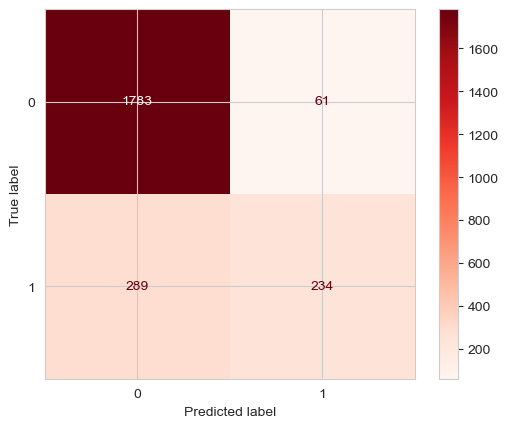

In [57]:
print('F1 Score - Train Set   : ', f1_score(y_train_encoded, y_pred_train_svc), '\n')
print('Classification Report : \n', classification_report(y_train_encoded, y_pred_train_svc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_svc, X_train, y_train_encoded, cmap='Reds'))

F1 Score - Train Set is 0.572, with f1 score for performance classification model class '0' is 0.91 and '1' is 0.57. From Confusion matrix, there are 1783 True Positive, 234 True Negative, 61 False Negative, and 289 False Positive

Here the F1 Score, cklassification report and confusion matrix for Test Set before HyperParameter Tuning

F1 Score - Test Set   :  0.4816753926701571 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       480
           1       0.58      0.41      0.48       112

    accuracy                           0.83       592
   macro avg       0.73      0.67      0.69       592
weighted avg       0.82      0.83      0.82       592
 

Confusion Matrix      : 


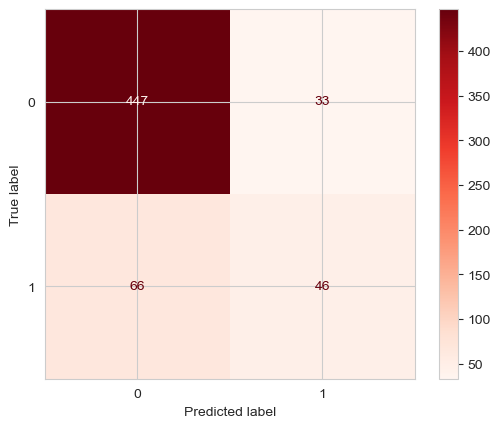

In [58]:
print('F1 Score - Test Set   : ', f1_score(y_test_encoded, y_pred_test_svc), '\n')
print('Classification Report : \n', classification_report(y_test_encoded, y_pred_test_svc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test_encoded, cmap='Reds'))

F1 Score - Train Set is 0.481, with f1 score for performance classification model class '0' is 0.9 and '1' is 0.48. From Confusion matrix, there are 447 True Positive, 46 True Negative, 33 False Negative, and 66 False Positive

To compare F1 score train and test before hyperparameter tuning and after hyperparameter tuning. Make into a DataFrame

In [59]:
# Save Classification Report into a Dictionary

all_reports = {}
# Function for f1 score report
def performance_report(all_reports, y_train_encoded, y_pred_train_svc, y_test_encoded, y_pred_test_svc, name):
  score_reports = {
      'train - f1_score' : f1_score(y_train_encoded, y_pred_train_svc),
      'test - f1_score' : f1_score(y_test_encoded, y_pred_test_svc),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train_encoded, y_pred_train_svc, y_test_encoded, y_pred_test_svc, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - f1_score,0.572127
test - f1_score,0.481675


From f1-score train and test before hyperparameter tuning, it indicated that the model is overfit due to large difference between train and test f1-score

----

<vspace>

### ***HyperParameter Tuning***

Hyperparameter tuning is used to optimize model performance. I employed random search for hyperparameter tuning because it efficiently explores the hyperparameter space and is less time-consuming than exhaustive methods like grid search. This method helps in finding the best parameters to achieve the optimal model performance within a reasonable time frame.

#### ***Random Search***

In [60]:
# Hyperparameter Tuning : Random search
from sklearn.model_selection import RandomizedSearchCV
# Select parameter 
param_randomized = {
    'svc__C':[0.1,0.5,1,10,50,100],
    'svc__kernel': ['rbf','sigmoid','linear'],
    'svc__gamma': [1,0.1,0.001,0.0001]
}

Next using random search to find best parameter

In [61]:
# Random search to find best parameter
rf_randomcv = RandomizedSearchCV(estimator=pipe_svc,
                                 param_distributions=param_randomized,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')
rf_randomcv.fit(X_train, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               ['limit_balance',
                                                                                'pay_amt_1',
                                                                                'pay_amt_2',
                                                                                'pay_amt_3',
                                                                                'pay_amt_4',
                                                                                'pay_amt_5',
                                                                                'pay_amt_6']),
                                                                              ('encoder',
                                                                               OrdinalEncoder(categories=[['1',
                                                                                                           '2',
                                                                                                           '3',
                                                                                                           '4',
                                                                                                           '5',
                                                                                                           '6']]),
                                                                               ['Education']),
                                                                              ('Encoder',
                                                                               OrdinalEncode...
                                                                                                           '1.0',
                                                                                                           '2.0',
                                                                                                           '3.0',
                                                                                                           '4.0',
                                                                                                           '5.0',
                                                                                                           '6.0',
                                                                                                           '7.0',
                                                                                                           '8.0'],
                                                                                                          ['-1.0',
                                                                                                           '1.0',
                                                                                                           '2.0',
                                                                                                           '3.0',
                                                                                                           '4.0',
                                                                                                           '5.0',
                                                                                                           '6.0',
                                                                                                           '7.0',
                                                                                                        

Here is the best parameter from hyperparameter tuning

In [62]:
# Show best parameter
rf_randomcv.best_params_

{'svc__kernel': 'linear', 'svc__gamma': 1, 'svc__C': 10}

best parameter for SVC model is kernel: linear, gamma : 1 , and C: 10

In [63]:

rf_randomcv_best = rf_randomcv.best_estimator_

Because y_test data type is object, so will change to integer

In [64]:
# Change data type to integer
y_test_int = y_test.astype(int)

Here the F1 Score, classification report and confusion matrix for Train Set After HyperParameter Tuning

F1 Score - Test Set   :  0.5287637698898409 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1844
           1       0.73      0.41      0.53       523

    accuracy                           0.84      2367
   macro avg       0.79      0.69      0.72      2367
weighted avg       0.83      0.84      0.82      2367
 

Confusion Matrix      : 


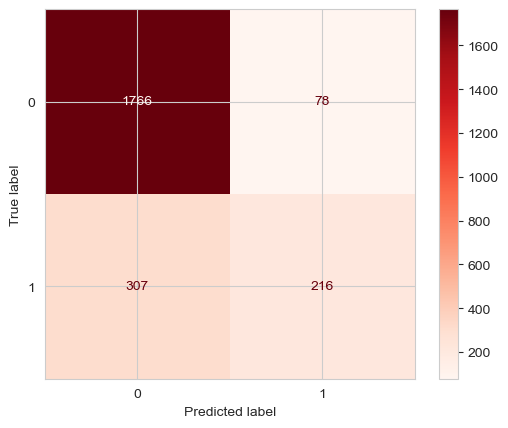

In [65]:
y_pred_train = rf_randomcv_best.predict(X_train)

print('F1 Score - Test Set   : ', f1_score(y_train_encoded, y_pred_train, pos_label=1), '\n')
print('Classification Report : \n', classification_report(y_train_encoded, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_train, y_train_encoded, cmap='Reds'))

F1 Score - Train Set is 0.528, with f1 score for performance classification model class '0' is 0.9 and '1' is 0.53. From Confusion matrix, there are 1766 True Positive, 216 True Negative, 78 False Negative, and 307 False Positive

Here the F1 Score, classification report and confusion matrix for Test Set After HyperParameter Tuning

F1 Score - Test Set   :  0.5128205128205128 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       480
           1       0.60      0.45      0.51       112

    accuracy                           0.84       592
   macro avg       0.74      0.69      0.71       592
weighted avg       0.83      0.84      0.83       592
 

Confusion Matrix      : 


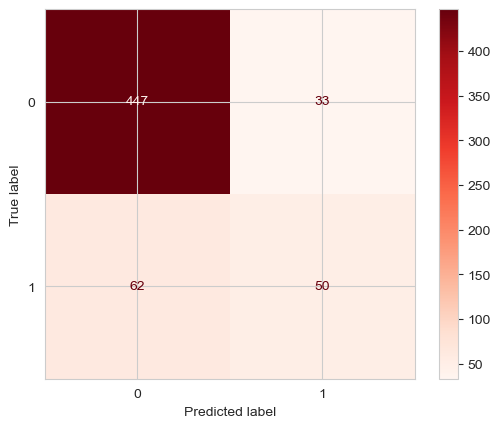

In [66]:
y_pred_test = rf_randomcv_best.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test_int, y_pred_test, pos_label=1), '\n')
print('Classification Report : \n', classification_report(y_test_int, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test, y_test_int, cmap='Reds'))

F1 Score - Test Set is 0.512, with f1 score for performance classification model class '0' is 0.9 and '1' is 0.51. From Confusion matrix, there are 447 True Positive, 50 True Negative, 33 False Negative, and 62 False Positive

Now let's compare f1 score train and test before and after hyperparameter tuning

In [67]:
# Make new column that show f1 score train and test after hyperparameter tuning
all_reports = performance_report(all_reports, y_train_encoded, y_pred_train, y_test_encoded, y_pred_test, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - f1_score,0.572127,0.528764
test - f1_score,0.481675,0.512821


This demonstrates a decrease in F1 score from before to after hyperparameter tuning in training, whereas an increase in F1 score is observed in testing before and after hyperparameter tuning. This also indicates that performing hyperparameter tuning improves the model fit, transforming it from initially overfit to good fit

Next, I want to examine which data points are causing the prediction error. To do this, we will combine X_test and y_test since the actual predictions are made on the test set. By analyzing these, we can identify the specific data points that contribute to the prediction error.

In [68]:
# Combine X_test and y_test
y_test = pd.DataFrame(y_test)
DataFrame = pd.concat([X_test,y_test], axis=1)

Next make new column named 'Hasil Prediksi'

In [69]:
# Make New columns hasil prediksi
DataFrame['Hasil Prediksi'] = y_pred_test

In [70]:
DataFrame

,limit_balance,Education,Age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Hasil Prediksi
796,150000.0,2,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2000.0,1500.0,1500.0,1000.0,0.0,0.0,0,0
1070,20000.0,2,30.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,0.0,1600.0,1602.0,900.0,900.0,636.0,0,0
1215,80000.0,3,41.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1576.0,1589.0,1000.0,239.0,0.0,1696.0,0,0
1526,460000.0,1,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5229.0,580464.0,80017.0,31017.0,27.0,38700.0,0,0
1611,160000.0,2,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,390.0,1560.0,0.0,0.0,0.0,390.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,500000.0,1,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1,0
501,360000.0,2,31.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14128.0,11208.0,6554.0,7248.0,7122.0,6144.0,1,0
119,150000.0,1,45.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3000.0,1300.0,1300.0,1200.0,1200.0,0.0,0,0
364,90000.0,1,25.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,4000.0,3258.0,1000.0,0.0,77500.0,0.0,0,1


Next i want to separate the data frame based on the similarity between predicted outcomes and actual outcomes. Because 'Hasil Prediksi' and 'default_payment_next_month' have different data type, then i want to change 'default_payment_next_month' data type from object to int

In [71]:
DataFrame['default_payment_next_month'] = DataFrame['default_payment_next_month'].astype(int)

Here is data frame when predicted outcomes same as actual outcomes

In [72]:
# DataFrame when predicted outcomes same as actual outcomes
DataFrame[DataFrame['default_payment_next_month'] == DataFrame['Hasil Prediksi']]

,limit_balance,Education,Age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Hasil Prediksi
796,150000.0,2,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2000.0,1500.0,1500.0,1000.0,0.0,0.0,0,0
1070,20000.0,2,30.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,0.0,1600.0,1602.0,900.0,900.0,636.0,0,0
1215,80000.0,3,41.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1576.0,1589.0,1000.0,239.0,0.0,1696.0,0,0
1526,460000.0,1,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5229.0,580464.0,80017.0,31017.0,27.0,38700.0,0,0
1611,160000.0,2,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,390.0,1560.0,0.0,0.0,0.0,390.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,200000.0,2,40.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1610.0,1310.0,713.0,5800.0,0.0,3000.0,0,0
1638,20000.0,3,31.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20.0,21431.0,2300.0,558.0,4403.0,0.0,0,0
287,150000.0,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8000.0,8000.0,5000.0,5000.0,5000.0,5000.0,0,0
119,150000.0,1,45.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3000.0,1300.0,1300.0,1200.0,1200.0,0.0,0,0


Here is data frame when predicted outcomes different to actual outcomes

In [73]:
# DataFrame when predicted outcomes different to actual outcomes
DataFrame[DataFrame['default_payment_next_month'] != DataFrame['Hasil Prediksi']]

,limit_balance,Education,Age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Hasil Prediksi
2267,210000.0,1,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3569.0,1737.0,2433.0,3115.0,3899.0,2460.0,1,0
2080,240000.0,2,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,18432.0,1416.0,16580.0,416.0,416.0,416.0,1,0
1945,40000.0,3,55.0,1.0,2.0,2.0,2.0,2.0,2.0,2000.0,0.0,3000.0,0.0,2382.0,0.0,0,1
2655,320000.0,2,41.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,700.0,860.0,2420.0,1,0
1972,120000.0,3,27.0,2.0,-1.0,-1.0,-1.0,2.0,-1.0,390.0,390.0,780.0,0.0,930.0,300.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,130000.0,1,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2038.0,311.0,1000.0,0.0,0.0,326.0,1,0
1444,20000.0,2,47.0,1.0,2.0,2.0,2.0,-1.0,-1.0,0.0,3000.0,0.0,1000.0,1000.0,1900.0,1,0
2469,500000.0,1,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1,0
501,360000.0,2,31.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,14128.0,11208.0,6554.0,7248.0,7122.0,6144.0,1,0


From the two data frames, it indicated that when the predicted outcome matches the actual outcomes, this is especially evident in the repayment column where it predominantly shows -1. However, when the predicted outcome differs from the actual outcome, this particulary occurs in the repayment columns where values not predominantly shows -1. It means that the model struggles to predict data where the data is have variety and  accurately but performs well with less variety data.

----
----

<vspace>

### ***Conclusion***

----

The SVC model was selected based on the best cross-validation score using the F1-score metric. Before hyperparameter tuning, there was a significant differences in F1 scores between training and testing data, indicating overfitting. After hyperparameter tuning, although there was a decrease in the F1 score on training data, the difference in F1 scores between the training and test set becomes minimal, indicating a good fit for the model. Analyzing actual data against predictions reveals that the model struggles to predict data where the data is have variety and  accurately but performs well with less variety data.

----
----

<vspace>

### ***Conseptual Problems***

----

#### ***1. Apakah yang dimaksud dengan coeficient pada logistic regression?***

The coefficient in logistic regression refers to the magnitude of change that occurs in a feature, influencing the prediction class outcome

#### ***2. Apakah fungsi parameter kernel pada SVM?***

The kernel parameter have function to transforms the input data into a higher-dimensional feature space, allowing for different types of separation, such as linear, polynomial, and radial basis function (RBF). 

#### ***3. Bagaimana cara memilih K yang optimal pada KNN ?***

First, create a graph displaying the number of neighbors against the error rate. From this graph, we can select the number of neighbors corresponding to the lowest error rate.

#### ***4. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?***

**Accuracy**    : Tell us how many correct prediction. It used when data is balance   
**Precision**   : To measures how often a model correctly predicts the positive class. It used when you need to minimize False Positive as lower as possible   
**Recall**      : To measures how often a model correctly predicts true positive from all actual positive samples. It used when you need minimize False Negative as lower as possible   
**F1 Score**    : To measure the harmonic mean of precision and recall. it used when you need minimize False Positive and False Negative as lower as possuble   

----
----

<vspace>

### ***Recommendation***

----

From the model i constructed, although hyperparameter tuninh improved it's performance, the F1 score remains relatively low. Therefore, expanding the parameter range in hyperparameter tuning and exploring alternative models may be necessary to achieve a higher F1 score. With the improved model, the bank can predict credit card defaulters more accurately

----

Next saving the model for inference

<vspace>

### ***Model Save***

----

Save the best model with it's optimal parameters as model_svr.plk as file1

In [74]:
# Save best model
with open('model_svr.pkl', 'wb') as file1:
  pickle.dump(rf_randomcv_best, file1)

----
----